In [4]:
import json
f = open("../Attachment/Attachment 1-Annotation/108.json")
data = json.load(f)
for i in data['shapes']:
    print(i['points'])

[[49.102564102564116, 30.567061143984223], [130.7593688362919, 116.7603550295858]]
[[125.23668639053255, 28.791913214990142], [223.46153846153845, 130.96153846153845]]


(185, 270, 3)


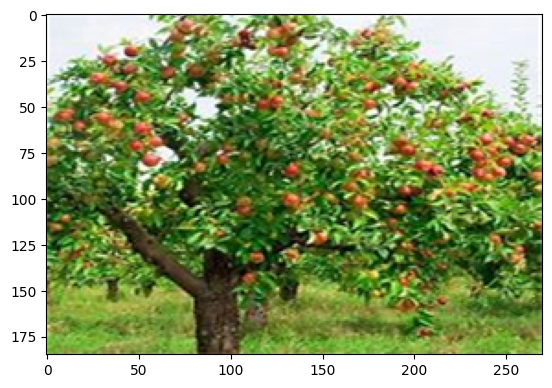

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
img = cv2.imread("../Attachment/Attachment 1/83.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)    # 185, 270, 3

3


'image_paths = "../Attachment/Attachment 1/"\ntotal_apples = 0\nfor path in os.listdir(image_paths):\n    print(path)\n    count = count_apples(image_paths + path)\n    print(count)\n    break\n'

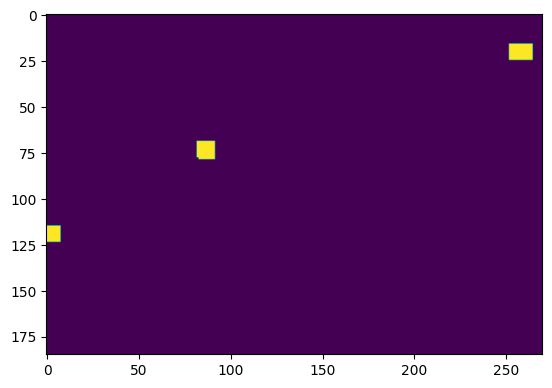

In [3]:

import os
def preprocess_image(original_image):
    hsv = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
    # 定义红色的HSV范围
    # 第一个范围捕捉色相值接近0°的红色
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])

    # 第二个范围捕捉色相值接近180°的红色
    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([180, 255, 255])
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask = cv2.bitwise_or(mask1, mask2)
    kernel = np.ones((5,5))
    mask = cv2.erode(mask, kernel, iterations=2)
    mask = cv2.dilate(mask, kernel, iterations=2)
    return mask

def count_apples(image_path):
    image = cv2.imread(image_path)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    processed_image = preprocess_image(image)
    plt.imshow(processed_image)
    contours, _ = cv2.findContours(processed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return len(contours)

print(count_apples("../Attachment/Attachment 1/22.jpg"))
'''image_paths = "../Attachment/Attachment 1/"
total_apples = 0
for path in os.listdir(image_paths):
    print(path)
    count = count_apples(image_paths + path)
    print(count)
    break
'''

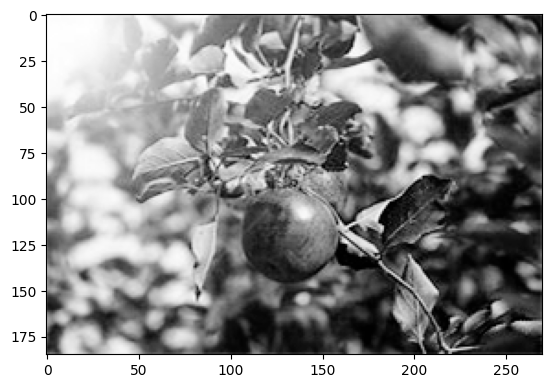

In [28]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 应用直方图均衡化
equalized = cv2.equalizeHist(gray)

# 如果需要，将处理后的图像转换回彩色
equalized_color = cv2.cvtColor(equalized, cv2.COLOR_GRAY2BGR)

plt.imshow(equalized_color)

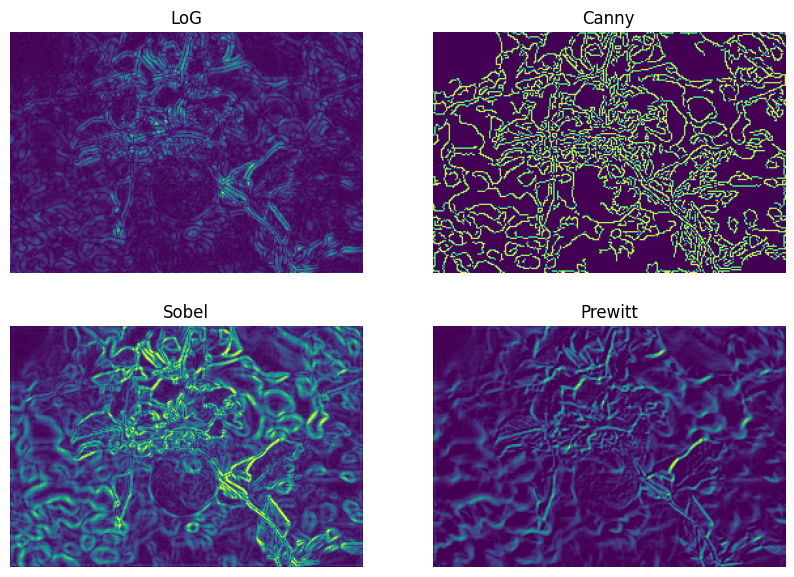

In [29]:
def apply_log(image, sigma=1.0):
    # 将图像转换为灰度
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # 应用高斯模糊
    blur = cv2.GaussianBlur(gray, (0, 0), sigma)
    # 应用Laplacian算子
    laplacian = cv2.Laplacian(blur, cv2.CV_64F)
    # 将结果转换为uint8类型
    laplacian = np.uint8(np.absolute(laplacian))
    return laplacian

def apply_canny(image, low_threshold=50, high_threshold=150):
    # 将图像转换为灰度
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # 应用Canny边缘检测
    canny_edges = cv2.Canny(gray, low_threshold, high_threshold)
    return canny_edges

def apply_sobel(image, ksize=3, scale=1, delta=0):
    # 将图像转换为灰度
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Sobel边缘检测
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=ksize, scale=scale, delta=delta)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=ksize, scale=scale, delta=delta)
    # 合并梯度
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    sobel_edges = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    return sobel_edges

def apply_prewitt(image):
    # 将图像转换为灰度
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # 定义Prewitt算子
    kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    kernely = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    # 应用Prewitt算子
    grad_x = cv2.filter2D(gray, -1, kernelx)
    grad_y = cv2.filter2D(gray, -1, kernely)
    # 合并梯度
    prewitt_edges = cv2.addWeighted(np.absolute(grad_x), 0.5, np.absolute(grad_y), 0.5, 0)
    return prewitt_edges


canny_image = apply_canny(img)
log_image = apply_log(img)
sobel_image = apply_sobel(img)
prewitt_image = apply_prewitt(img)

edge_img = [log_image, canny_image, sobel_image, prewitt_image]  # (185, 270)
edge_name = ['LoG','Canny','Sobel','Prewitt']
rows = 2
columns = 2
fig = plt.figure(figsize=(10, 7)) 
for i in range(len(edge_img)):
    fig.add_subplot(rows, columns, i+1) 
    plt.imshow(edge_img[i]) 
    plt.axis('off') 
    plt.title(edge_name[i]) 


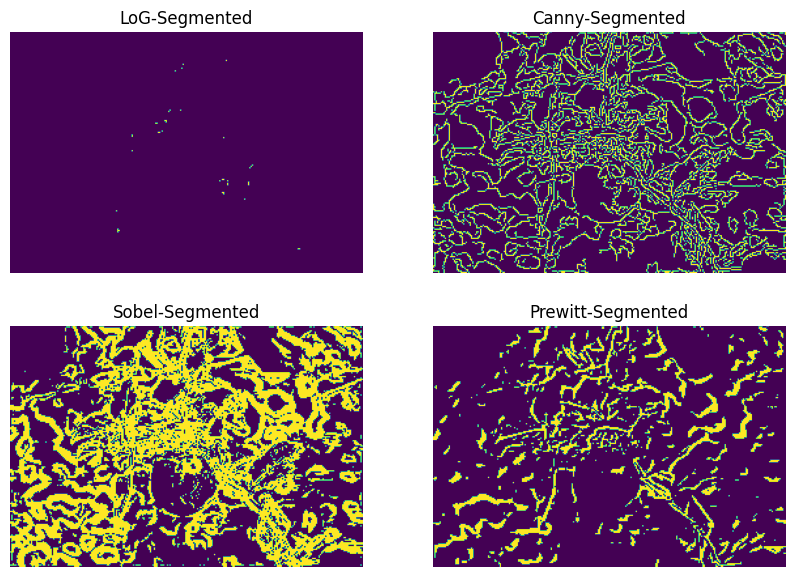

In [30]:
# Function to perform segmentation
def segment_image(edge_detected):
    # Thresholding to create a binary image
    _, binary = cv2.threshold(edge_detected, 50, 255, cv2.THRESH_BINARY)
    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Create an empty image for segmentation
    segmented = np.zeros_like(binary)
    # Fill the contours to segment the image
    cv2.drawContours(segmented, contours, -1, (255, 255, 255), thickness=cv2.FILLED)
    return segmented

seg_img = [segment_image(log_image), segment_image(canny_image), segment_image(sobel_image), segment_image(prewitt_image)]  # (185, 270)
edge_name = ['LoG-Segmented','Canny-Segmented','Sobel-Segmented','Prewitt-Segmented']
fig = plt.figure(figsize=(10, 7)) 
for i in range(len(edge_img)):
    fig.add_subplot(rows, columns, i+1) 
    plt.imshow(seg_img[i]) 
    plt.axis('off') 
    plt.title(edge_name[i]) 

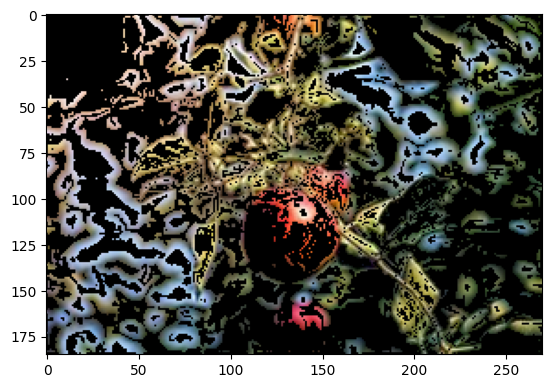

In [31]:
original_image = img
# Convert the segmented image to a binary mask
_, mask = cv2.threshold(seg_img[1], 0, 255, cv2.THRESH_BINARY)
# Apply the mask to the original image
masked_image = cv2.bitwise_and(original_image, original_image, mask=mask)

# Display the result
plt.imshow(original_image)
plt.imshow(mask)
plt.imshow(masked_image)

苹果的数量: 0


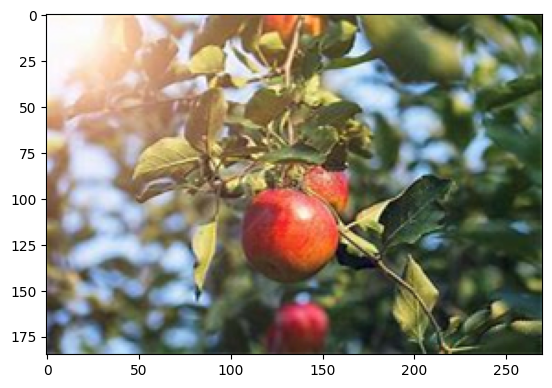

In [57]:
original_image = img
segmented_image = seg_img[1]
# 找到分割图像中的轮廓
contours, _ = cv2.findContours(segmented_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
apple_count = 0  # 苹果计数
# 遍历轮廓进行物体识别
# 遍历每个轮廓
for contour in contours:
    # 计算轮廓的边界框
    x, y, w, h = cv2.boundingRect(contour)
    # 提取轮廓区域的原始颜色
    roi = original_image[y:y+h, x:x+w]
    # 定义红色的HSV范围
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([180, 255, 255])
    #hsv = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
    # 将ROI转换到HSV颜色空间
    hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    # 创建红色区域的掩码
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask = cv2.bitwise_or(mask1, mask2)
    kernel = np.ones((5,5))
    mask = cv2.erode(mask, kernel, iterations=2)
    mask = cv2.dilate(mask, kernel, iterations=2)
    # 如果掩码中有足够的红色区域，则认为是红苹果
    if cv2.countNonZero(mask) > 50:  # 假设红色区域的像素数大于100
        apple_count += 1
        cv2.rectangle(original_image, (x, y), (x+w, y+h), (0, 0, 255), 2)

# 显示带有边界框的图像
# 显示带有边界框的图像
plt.imshow(original_image)
print("苹果的数量:", apple_count)